In [13]:
import operator
from keras.datasets import boston_housing
from keras import layers
from keras import models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [14]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [15]:
train_data.shape

(404, 13)

In [16]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [17]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0) #标准差
train_data/=std
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [18]:
test_data-=mean
test_data/=std
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [19]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1,activation='relu'))

    model.compile(optimizer='adam',loss='mse',metrics=['mae'])

    return model

In [20]:
def start_train(model,epochs, partial_train_data, partial_train_targets,val_data=None, val_targets=None):
    if val_data is not None and val_targets is not None :
        history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=epochs,batch_size=16,verbose=0)
    else:
        history=model.fit(partial_train_data,partial_train_targets,epochs=epochs,batch_size=16,verbose=0)

    return history

In [21]:
kfold = KFold(n_splits=4,shuffle=False,random_state=None)

all_mae_histories=[]
for train_index, validation_index in kfold.split(train_data, train_targets):
    # print(type(train_data[train_index]))
    model=build_model()
    history=start_train(model,500,train_data[train_index],train_targets[train_index],val_data=train_data[validation_index],val_targets=train_targets[validation_index])
    # val_mse, val_mae =model.evaluate(train_data[validation_index],train_targets[validation_index])
    mae_history = history.history['val_mean_absolute_error']
    print(mae_history)
    all_mae_histories.append(mae_history)



[20.113795327668143, 17.459587512630048, 13.259684628779345, 7.988112024741597, 5.252660897698733, 4.271829033842181, 3.753084109561278, 3.32107151144802, 3.1917423021675337, 3.048039771542691, 2.951389251369061, 2.9231282838500374, 2.8067410747603616, 2.7948742715438994, 2.682693935856961, 2.6853445237225824, 2.6226078094822345, 2.6350166596988642, 2.5803120325107387, 2.5196435557733667, 2.5382880952098583, 2.483255610607638, 2.4393455037976257, 2.439993617558243, 2.3513168320797457, 2.3963641010888734, 2.3461544136009596, 2.333358877956277, 2.2789016737796293, 2.308425011021076, 2.2512632077283197, 2.2310489073838338, 2.2087169708591876, 2.1954810997047045, 2.165331493509878, 2.173470435756268, 2.1301040436961864, 2.116637352669593, 2.1354448700895405, 2.102864482615254, 2.0564717561891763, 2.124654769897461, 2.0737035180082417, 2.0638323066258195, 2.0395654144853648, 2.076625347137451, 2.0086673132263786, 2.1089850911999695, 2.004974119734056, 2.0088988955658262, 1.9902783927350942,

In [22]:

# print(scores)
# print(np.mean(scores))

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(500)]

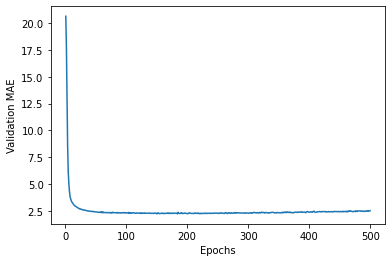

In [23]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

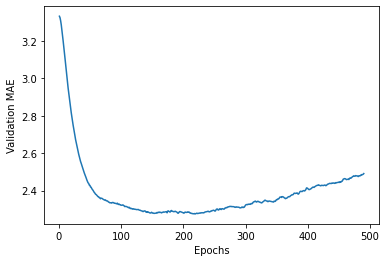

In [24]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [25]:
kfold = KFold(n_splits=4,shuffle=False,random_state=None)

scores=[]
model_list=[]
for train_index, validation_index in kfold.split(train_data, train_targets):
    # print(type(train_data[train_index]))
    model=build_model()
    history=start_train(model,200,train_data[train_index],train_targets[train_index],val_data=train_data[validation_index],val_targets=train_targets[validation_index])
    val_mse, val_mae =model.evaluate(train_data[validation_index],train_targets[validation_index])
    model_list.append(model)
    scores.append(val_mae)

101/101 [==============================] - 0s 25us/step


In [26]:
print(scores)
print(np.mean(scores))
print(np.min(scores))
min_index, min_score = min(enumerate(scores), key=operator.itemgetter(1))
best_model=model_list[min_index]
test_mse_score, test_mae_score = best_model.evaluate(test_data, test_targets)
print(test_mae_score)

[2.3214218640091397, 2.4371105373495876, 2.3901589034807564, 2.397215438361215]
2.386476685800175
2.3214218640091397
102/102 [==============================] - 0s 43us/step
2.5440035053327974
